# Data Mining Techniques
## Assignment 1

### Group 98: Moos Middelkoop, Willem Huijzer, Max Feucht

In [58]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno

### Task 1A: Exploratory Data Analysis

Start with exploring the raw data that is available:
- Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning. <br><br>
- Make various plots of the data. Is there something interesting worth reporting? Re-
port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.

In [59]:
# Read the data
data = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)
display(data.head(10))

# Print the number of rows and columns
print(f"\nNumber of lines: {data.shape[0]}\t number of columns: {data.shape[1]}")

# Print the number of unique IDs
print(f"\nNumber of unique users: {len(data['id'].unique())}")

# Print the unique IDs
print(f"\nUnique IDs: {data['id'].unique()}")

# See if there are entries from a year that is not 2014
print(f"\nUnique years: {data['time'].str[:4].unique()}")

# Print unique months
print(f"\nUnique months: {data['time'].str[5:7].unique()}")

# Print number of unique month day combinations
print(f"\nNumber of unique month day combinations: {len(data['time'].str[5:10].unique())}")

# Print the unique variables, and the number of them
print(f"\nUnique variables: {data['variable'].unique()}")
print(f"\nNumber of unique variables: {len(data['variable'].unique())}")

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
10,AS14.01,2014-03-21 15:00:00.000,mood,7.0



Number of lines: 376912	 number of columns: 4

Number of unique users: 27

Unique IDs: ['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']

Unique years: ['2014']

Unique months: ['02' '03' '04' '05' '06']

Number of unique month day combinations: 113

Unique variables: ['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']

Number of unique variables: 19


IndexError: index 5 is out of bounds for axis 1 with size 5

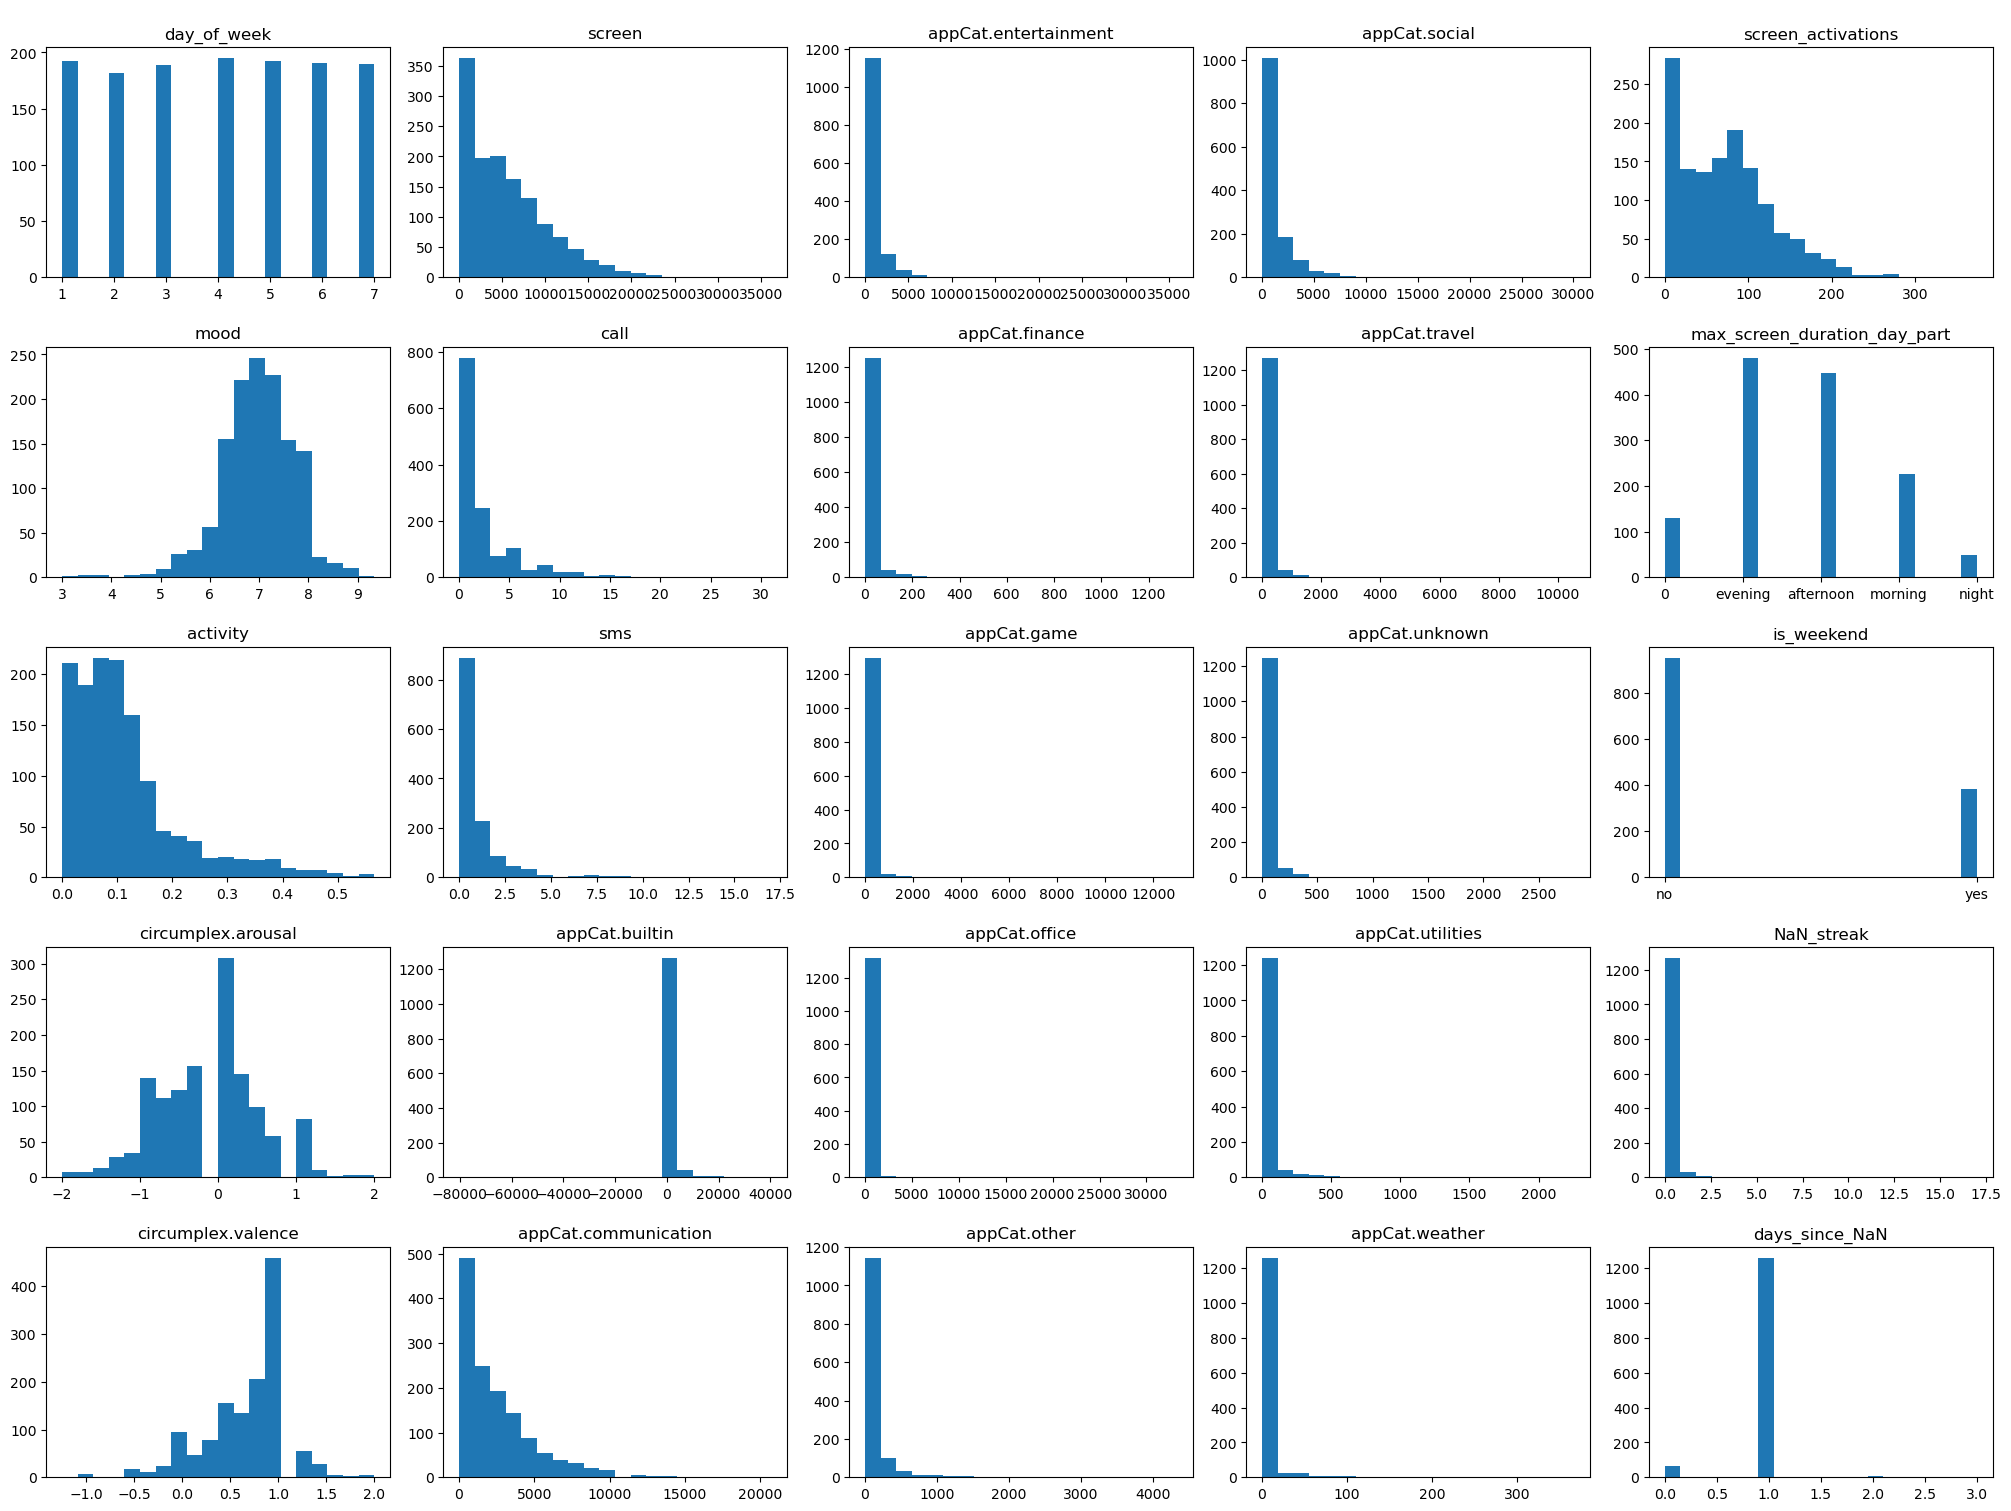

In [60]:
# Plots
data_graphics = pd.read_csv('data/imputed_data_v2.csv')

fig, axs = plt.subplots(5, 5, figsize = (20, 15), constrained_layout = True)
k = 0
for i, var in enumerate(data_graphics.iloc[:,4:].columns):
    axs[i - k*5, k].hist(data_graphics[var], bins = 20)
    axs[i - k*5, k].set_title("\n" + var)
    if (i + 1) % 5 == 0:
        k += 1

plt.show()

/var/folders/gb/wg4yqhd96qdd3bv_wbfq_5b40000gn/T/ipykernel_44521/256221097.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_graphics.iloc[:,4:].corr()


<AxesSubplot: >

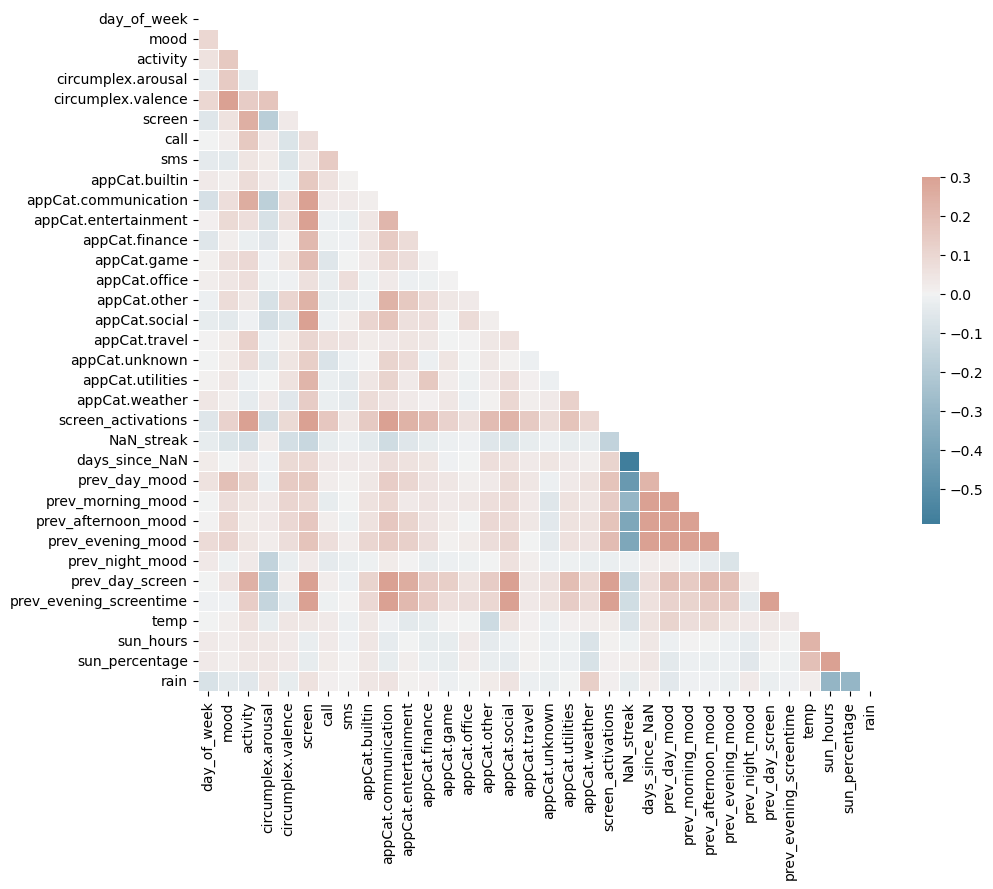

In [61]:
# Correlation Matrix

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data_graphics.iloc[:,4:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

First we will to remove all negative datapoints, except for the valence and arousal variables. As we are dealing with either event counts or activity time measures, negative data points make no sense and can be assumed to be erroneous. This also immediately deletes NA values. It is however possibly interesting to see how many missing or and negative values actually were present before they got deleted

In [62]:
# dataframe without variables circumplex.arousal and circumplex.valence
data_without_arousal = data[data['variable'] != 'circumplex.arousal']

# remove valence too
data_without_circumplex = data_without_arousal[data_without_arousal['variable'] != 'circumplex.valence']

# remove rows with negative values
data_cleaned = data_without_circumplex[data_without_circumplex['value'] >= 0]

Get more data for the table

In [63]:
all_vars = data_cleaned['variable'].unique()

for var in all_vars:
    var_mask = data_cleaned['variable'] == var
    var_df = data_cleaned[var_mask]

    old_var_mask = data['variable'] == var
    old_var_df = data[old_var_mask]

    value_range = (var_df['value'].min(), var_df['value'].max())
    mean_value = var_df['value'].mean()
    std_value = var_df['value'].std()

    # I just can't get this to work, it doesn't seem to be able to find the NA values
    num_na = old_var_df['value'].isnull().sum()
    
    num_neg = old_var_df['value'].lt(0).sum()

    print(f"Variable: {var}\t & {value_range[0]}, {value_range[1]} & {round(mean_value, 3)} & {round(std_value, 3)} & {num_na} & {num_neg}\\\\")


# get the first and last datetime values
first_time = data['time'].min()
last_time = data['time'].max()

# output the results
print("First time: ", first_time)
print("Last time: ", last_time)

# filter dataframe to only include "mood" variable
mood_df = data[data['variable'] == 'mood']

# get the first and last datetime values for "mood" variable
first_mood_time = mood_df['time'].min()
last_mood_time = mood_df['time'].max()

# output the results
print("First mood time: ", first_mood_time)
print("Last mood time: ", last_mood_time)

Variable: mood	 & 1.0, 10.0 & 6.993 & 1.033 & 0 & 0\\
Variable: activity	 & 0.0, 1.0 & 0.116 & 0.187 & 0 & 0\\
Variable: screen	 & 0.0350000858306885, 9867.00699996948 & 75.335 & 253.822 & 0 & 0\\
Variable: call	 & 1.0, 1.0 & 1.0 & 0.0 & 0 & 0\\
Variable: sms	 & 1.0, 1.0 & 1.0 & 0.0 & 0 & 0\\
Variable: appCat.builtin	 & 0.001, 33960.246 & 19.446 & 312.915 & 0 & 3\\
Variable: appCat.communication	 & 0.006, 9830.777 & 43.344 & 128.913 & 0 & 0\\
Variable: appCat.entertainment	 & 0.001, 32148.677 & 37.578 & 262.965 & 0 & 1\\
Variable: appCat.finance	 & 0.131, 355.513 & 21.755 & 39.218 & 0 & 0\\
Variable: appCat.game	 & 1.003, 5491.793 & 128.392 & 327.145 & 0 & 0\\
Variable: appCat.office	 & 0.003, 32708.818 & 22.579 & 449.601 & 0 & 0\\
Variable: appCat.other	 & 0.014, 3892.038 & 25.811 & 112.781 & 0 & 0\\
Variable: appCat.social	 & 0.094, 30000.906 & 72.402 & 261.552 & 0 & 0\\
Variable: appCat.travel	 & 0.08, 10452.615 & 45.731 & 246.109 & 0 & 0\\
Variable: appCat.unknown	 & 0.111, 2239.93

In [64]:
# save cleaned data
data_cleaned.to_csv('data/data_no_neg.csv')


### Task 1C: Feature Engineering 

While we now have a clean dataset, we can still take one step before we move to classification
that can in the end help to improve performance, namely feature engineering. As discussed
during the lectures, feature engineering is a creative process and can involve for example the
transformation of values (e.g. take the log of values given a certain distribution of values) or combining multiple features (e.g. two features that are more valuable combined than the two
separate values). Think of a creative feature engineering approach for your dataset, describe
it, and apply it. Report on why you think this is a useful enrichment of your dataset. <br>

Advanced: Essentially there are two approaches you can consider to create a predictive model
using this dataset (which we will do in the next part of this assignment): (1) use a machine
learning approach that can deal with temporal data (e.g. ARIMA, recurrent neural networks)
or you can try to aggregate the history somehow to create attributes that can be used in a
more common machine learning approach (e.g. SVM, decision tree). For instance, you use
the average mood during the last five days as a predictor. Ample literature is present in the
area of temporal data mining that describes how such a transformation can be made. For
the feature engineering, you are going to focus on such a transformation in this part of the
assignment. This is illustrated in Figure 1.
In the end, we end up with a dataset with a number of training instances per patient (as
you have a number of time points for which you can train), i.e. an instance that concerns
the mood at t=1, t=2, etc. Of course it depends on your choice of the history you consider
relevant from what time point you can start predicting (if you use a windows of 5 days of
history to create attributes you cannot create training instances before the 6th day). To come
to this dataset, you need to:
1. Define attributes that aggregate the history, draw inspiration from the field of temporal
data mining.
2. Define the target by averaging the mood over the entire day.
3. Create an instance-based dataset as described in Figure 1.

In [65]:
# First features 1, 2 and 3 based on date, month, and day of week

data = pd.read_csv('data/dataset_mood_smartphone.csv', index_col=0)

data['time'] = pd.to_datetime(data['time']) # Convert time column to datetime
# Feature 1, 2: Month, and day of week
data['date'] = data['time'].dt.date  # Create new date, month, and day of week columns
data['month'] = data['time'].dt.month
data['day_of_week'] = data['time'].dt.dayofweek + 1 # Adding 1 to make Monday = 1, Sunday = 7
# Convert month and day_of_week to categorical values
data['month'] = pd.Categorical(data['month'], categories=range(1,13))
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=range(1,8))

# Create temporary variable rime of day
hour = data['time'].dt.hour
conditions = [
    (hour >= 0) & (hour < 6),   # Night
    (hour >= 6) & (hour < 12),  # Morning
    (hour >= 12) & (hour < 18), # Afternoon
    (hour >= 18) & (hour <= 23) # Evening
]
choices = ['night', 'morning', 'afternoon', 'evening']

data['time_of_day'] = np.select(conditions, choices)



In [66]:
# MAKE THE NEW DATA FORMAT
to_average = ['id', 'date', 'month', 'day_of_week', 'mood', 'activity', 'circumplex.arousal', 'circumplex.valence']
to_sum = [var for var in data['variable'].unique() if var not in to_average]

# I use this as to maintain NaN values in the sum columns
def calc_sum(group):
    return group.sum() 
        
# Create the new dataset
new_data_mean = pd.pivot_table(data, values='value', index=['id', 'date', 'month', 'day_of_week'], columns='variable', aggfunc= 'mean')
new_data_sum = pd.pivot_table(data, values='value', index=['id', 'date', 'month', 'day_of_week'], columns='variable', aggfunc=calc_sum)
new_data_sum.reset_index(inplace=True)
new_data_mean.reset_index(inplace=True)

# Merge the two datasets on the common columns
merged_data = pd.concat([new_data_mean[to_average], new_data_sum[to_sum]], axis=1)

In [70]:
import datetime
import yfinance as yf

# Create features 3 - 18 

# Create feature 3, counter for 'screen_activations'
screen_activation_data = data[data['variable'] == 'screen'].groupby(['id', 'date'])['variable'].count().reset_index()
screen_activation_data = screen_activation_data.rename(columns={'variable': 'screen_activations'})
merged_data = pd.merge(merged_data, screen_activation_data, on=['id', 'date'], how='left')

# Create feature 4, 'max_screen_duration_day_part'
screen_duration_data = data[data['variable'] == 'screen'].groupby(['id', 'date', 'time_of_day'])['value'].sum().reset_index()
max_screen_duration_day_part = screen_duration_data.loc[screen_duration_data.groupby(['id', 'date'])['value'].idxmax()][['id', 'date', 'time_of_day']]
merged_data = pd.merge(merged_data, max_screen_duration_day_part, on=['id', 'date'], how='left')
merged_data.rename(columns={'time_of_day': 'max_screen_duration_day_part'}, inplace=True)

# Create feature 5, 'is_weekend' to indicate if a day is a weekend or not
merged_data['is_weekend'] = merged_data['day_of_week'].apply(lambda x: 'yes' if x in (6, 7) else 'no')

# Create feature 6, 'NaN_streak' how many days before that consecutive days mood was NaN
merged_data['NaN_streak'] = merged_data['mood'].isna().groupby((merged_data['mood'].notnull()).cumsum()).cumsum()

# Create feature 7, 'days_since_NaN' how many days since the last day mood had a NaN value
merged_data['days_since_NaN'] = merged_data['date'].diff().dt.days.where(merged_data['mood'].notna()).fillna(0).astype(int)

# Create feature 8, 'NaN_combined' subtract 'days_since_NaN' from 'NaN_streak'
# merged_data['NaN_combined'] = merged_data['NaN_streak'] - (merged_data['days_since_NaN']

# Create feature 9, 'prev_day_mood' the mood of the previous day 
merged_data['prev_day_mood'] = merged_data.groupby('id')['mood'].shift(1) # !!!!! What happens if the first day is NaN? and what to do with last day?
merged_data['prev_valence_mood'] = merged_data.groupby('id')['circumplex.valence'].shift(1) # !!!!! What happens if the first day is NaN? and what to do with last day?
merged_data['prev_arousal_mood'] = merged_data.groupby('id')['circumplex.arousal'].shift(1) # !!!!! What happens if the first day is NaN? and what to do with last day?

# Create feature 10 - 13 for the previous day's mood for each time of day
mood_data = data[data['variable'] == 'mood']

for time_of_day in ['morning', 'afternoon', 'evening', 'night']:
    mood_data_time = mood_data[mood_data['time_of_day'] == time_of_day].groupby(['id', 'date'])['value'].mean().reset_index()
    mood_data_time[f'prev_{time_of_day}_mood'] = mood_data_time.groupby('id')['value'].shift(1)
    
    merged_data = pd.merge(merged_data, mood_data_time[['id', 'date', f'prev_{time_of_day}_mood']], on=['id', 'date'], how='left')

# take moving average of mood for the last 3 days
merged_data['mood_2_day_avg'] = merged_data.groupby('id')['mood'].transform(lambda x: x.rolling(3, min_periods=1).mean())
merged_data['mood_3_day_avg'] = merged_data.groupby('id')['mood'].transform(lambda x: x.rolling(3, min_periods=1).mean())
merged_data['mood_5_day_avg'] = merged_data.groupby('id')['mood'].transform(lambda x: x.rolling(5, min_periods=1).mean())
merged_data['mood_7_day_avg'] = merged_data.groupby('id')['mood'].transform(lambda x: x.rolling(7, min_periods=1).mean())

# Create feature 14, 'prev_day_screen' the screentime of the previous day 
merged_data['prev_day_screen'] = merged_data.groupby('id')['screen'].shift(1) # !!!!! What happens if the first day is NaN? and what to do with last day?

# Create feature 15, 'prev_evening_screentime' the mood of the previous day
evening_screen_data = data[(data['variable'] == 'screen') & (data['time_of_day'] == 'evening')].groupby(['id', 'date'])['value'].sum().reset_index()
evening_screen_data['prev_evening_screentime'] = evening_screen_data.groupby('id')['value'].shift(1)
merged_data = pd.merge(merged_data, evening_screen_data[['id', 'date', 'prev_evening_screentime']], on=['id', 'date'], how='left')


# create feature 17, 18, 'temp'  and 'sun_hours' the activity of the previous day
weather_data = pd.read_csv('data/weather_schiphol.csv')  #https://daggegevens.knmi.nl/klimatologie/daggegevens
weather_data.rename(columns={'YYYYMMDD': 'date', 'TX': 'temp', 'SQ': 'sun_hours', 'SP' : 'sun_percentage' , 'RH': 'rain', 'NG': 'clouds'}, inplace=True)
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y%m%d')
merged_data['date'] = pd.to_datetime(merged_data['date'])

merged_data = pd.merge(merged_data, weather_data[['date', 'temp', 'sun_hours', 'sun_percentage', 'rain', 'clouds']], on=['date'], how='left')

merged_data['rain_weather_interaction'] = merged_data['rain'] * merged_data['appCat.weather']
merged_data['sun_weather_interaction'] = merged_data['sun_hours'] * merged_data['appCat.weather'] * merged_data['sun_percentage']
# merged_data['sun_weather_interaction'] = merged_data['weekend'] * merged_data['appCat.office']

#create feature 19, INDEX: SPS 500 
start_date = datetime.date(2014, 2, 16)
end_date = datetime.date(2014, 6, 9)
sp500 = yf.download('^GSPC', start=start_date, end=end_date + datetime.timedelta(days=1))
sp500['SP500 Change'] = sp500['Adj Close'].pct_change()
sp500.reset_index(inplace=True)
sp500.rename(columns={'Date': 'date'}, inplace=True)

merged_data = pd.merge(merged_data, sp500[['date', 'SP500 Change']], on=['date'], how='left')
merged_data['Stock_App_SP500_interaction'] = merged_data['SP500 Change'] * merged_data['appCat.finance']
merged_data['Circumplexity_Interaction'] = merged_data['circumplex.valence'] * merged_data['circumplex.arousal']


# Select numerical variables and calculate mood ranking
numerical_cols = merged_data.select_dtypes(include=['float', 'int']).columns.tolist()
corr_with_mood = merged_data[numerical_cols + ['mood']].corrwith(merged_data['mood'], method='spearman').sort_values(ascending=False)
print(corr_with_mood)

# print(merged_data.head(15)) 

merged_data.to_csv('data/merged_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed
mood                           1.000000
mood                           1.000000
mood_3_day_avg                 0.774168
mood_2_day_avg                 0.774168
mood_5_day_avg                 0.678584
mood_7_day_avg                 0.657913
circumplex.valence             0.631404
prev_day_mood                  0.476913
prev_evening_mood              0.434948
prev_afternoon_mood            0.365718
prev_night_mood                0.347890
prev_morning_mood              0.327965
prev_valence_mood              0.266309
activity                       0.214152
appCat.other                   0.151907
appCat.entertainment           0.146717
circumplex.arousal             0.111802
screen_activations             0.109897
sun_weather_interaction        0.108662
prev_day_screen                0.088530
appCat.game                    0.078702
appCat.office                  0.076885
appCat.utilities               0.073556
appCat.comm

/opt/miniconda3/envs/progLab/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


## Task 1B: Data Cleaning

As the insights from Task 1A will have shown, the dataset you analyze contains quite some
noise. Values are sometimes missing, and extreme or incorrect values are seen that are likely
outliers you may want to remove from the dataset. We will clean the dataset in two steps:
- Apply an approach to remove extreme and incorrect values from your dataset. Describe
what your approach is, why you consider that to be a good approach, and describe what
the result of applying the approach is. <br><br>
- Impute the missing values using two different approaches. Describe the approaches
and study the impact of applying them to your data. Argue which one of the two ap-
proaches would be most suitable and select that one to form your cleaned dataset. Also
base yourself on scientific literature for making your choice.
Advanced: The advanced dataset contains a number of time series, select approaches to im-
pute missing values that are logical for such time series. Also consider what to do with pro-
longed periods of missing data in a time series.

Firstly, we remove negative time, mood, or activity values

In [71]:
data_1b = pd.read_csv('data/merged_data.csv')

sub_0_mask = data_1b[['activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']] >= 0
# data_1b = data_1b[sub_0_mask]


beepboop = data_1b.describe()

First, we explore missing values and decide what to do with them

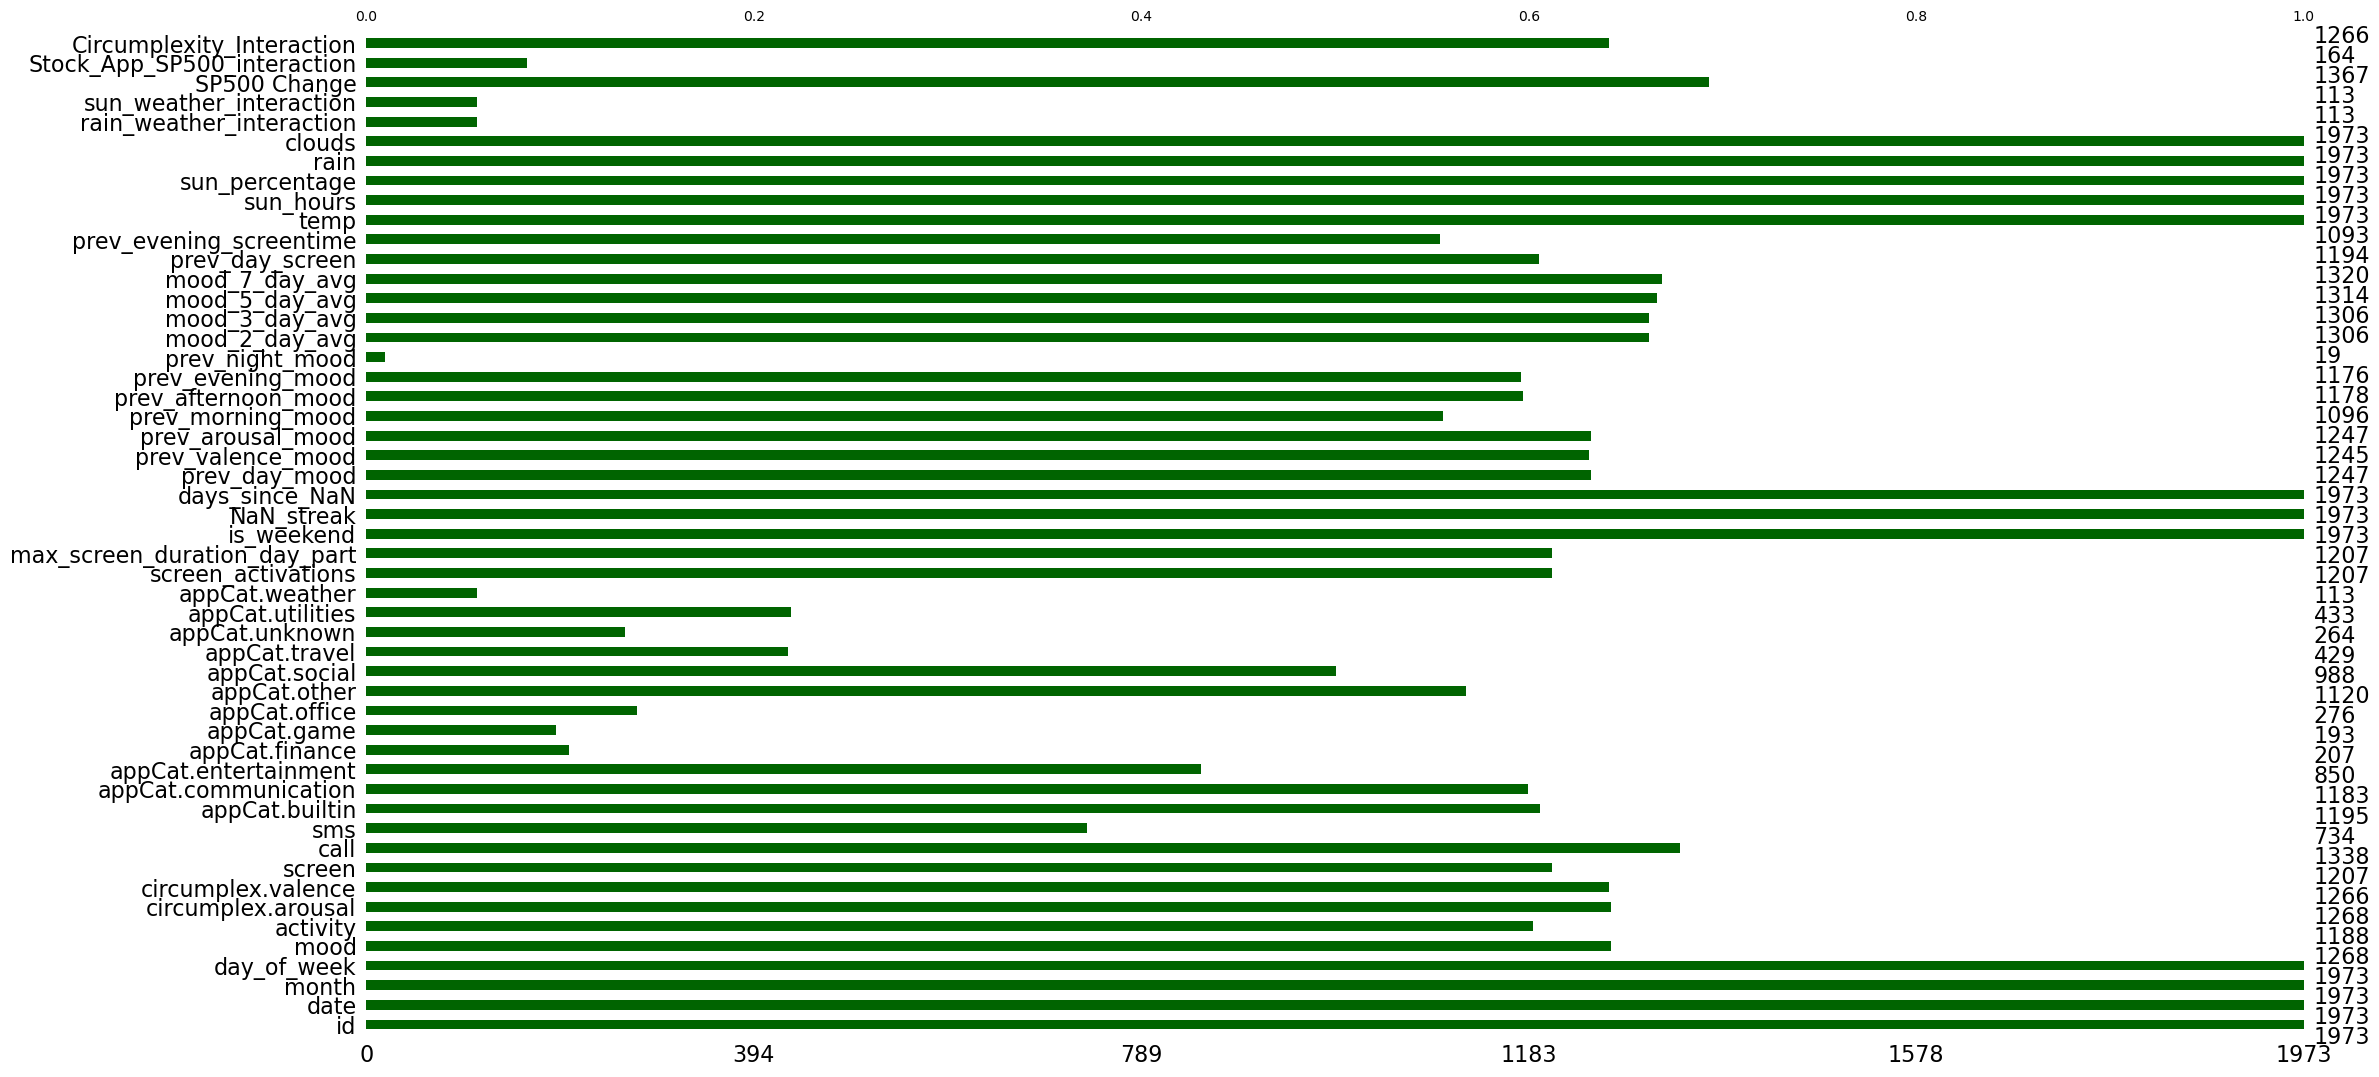

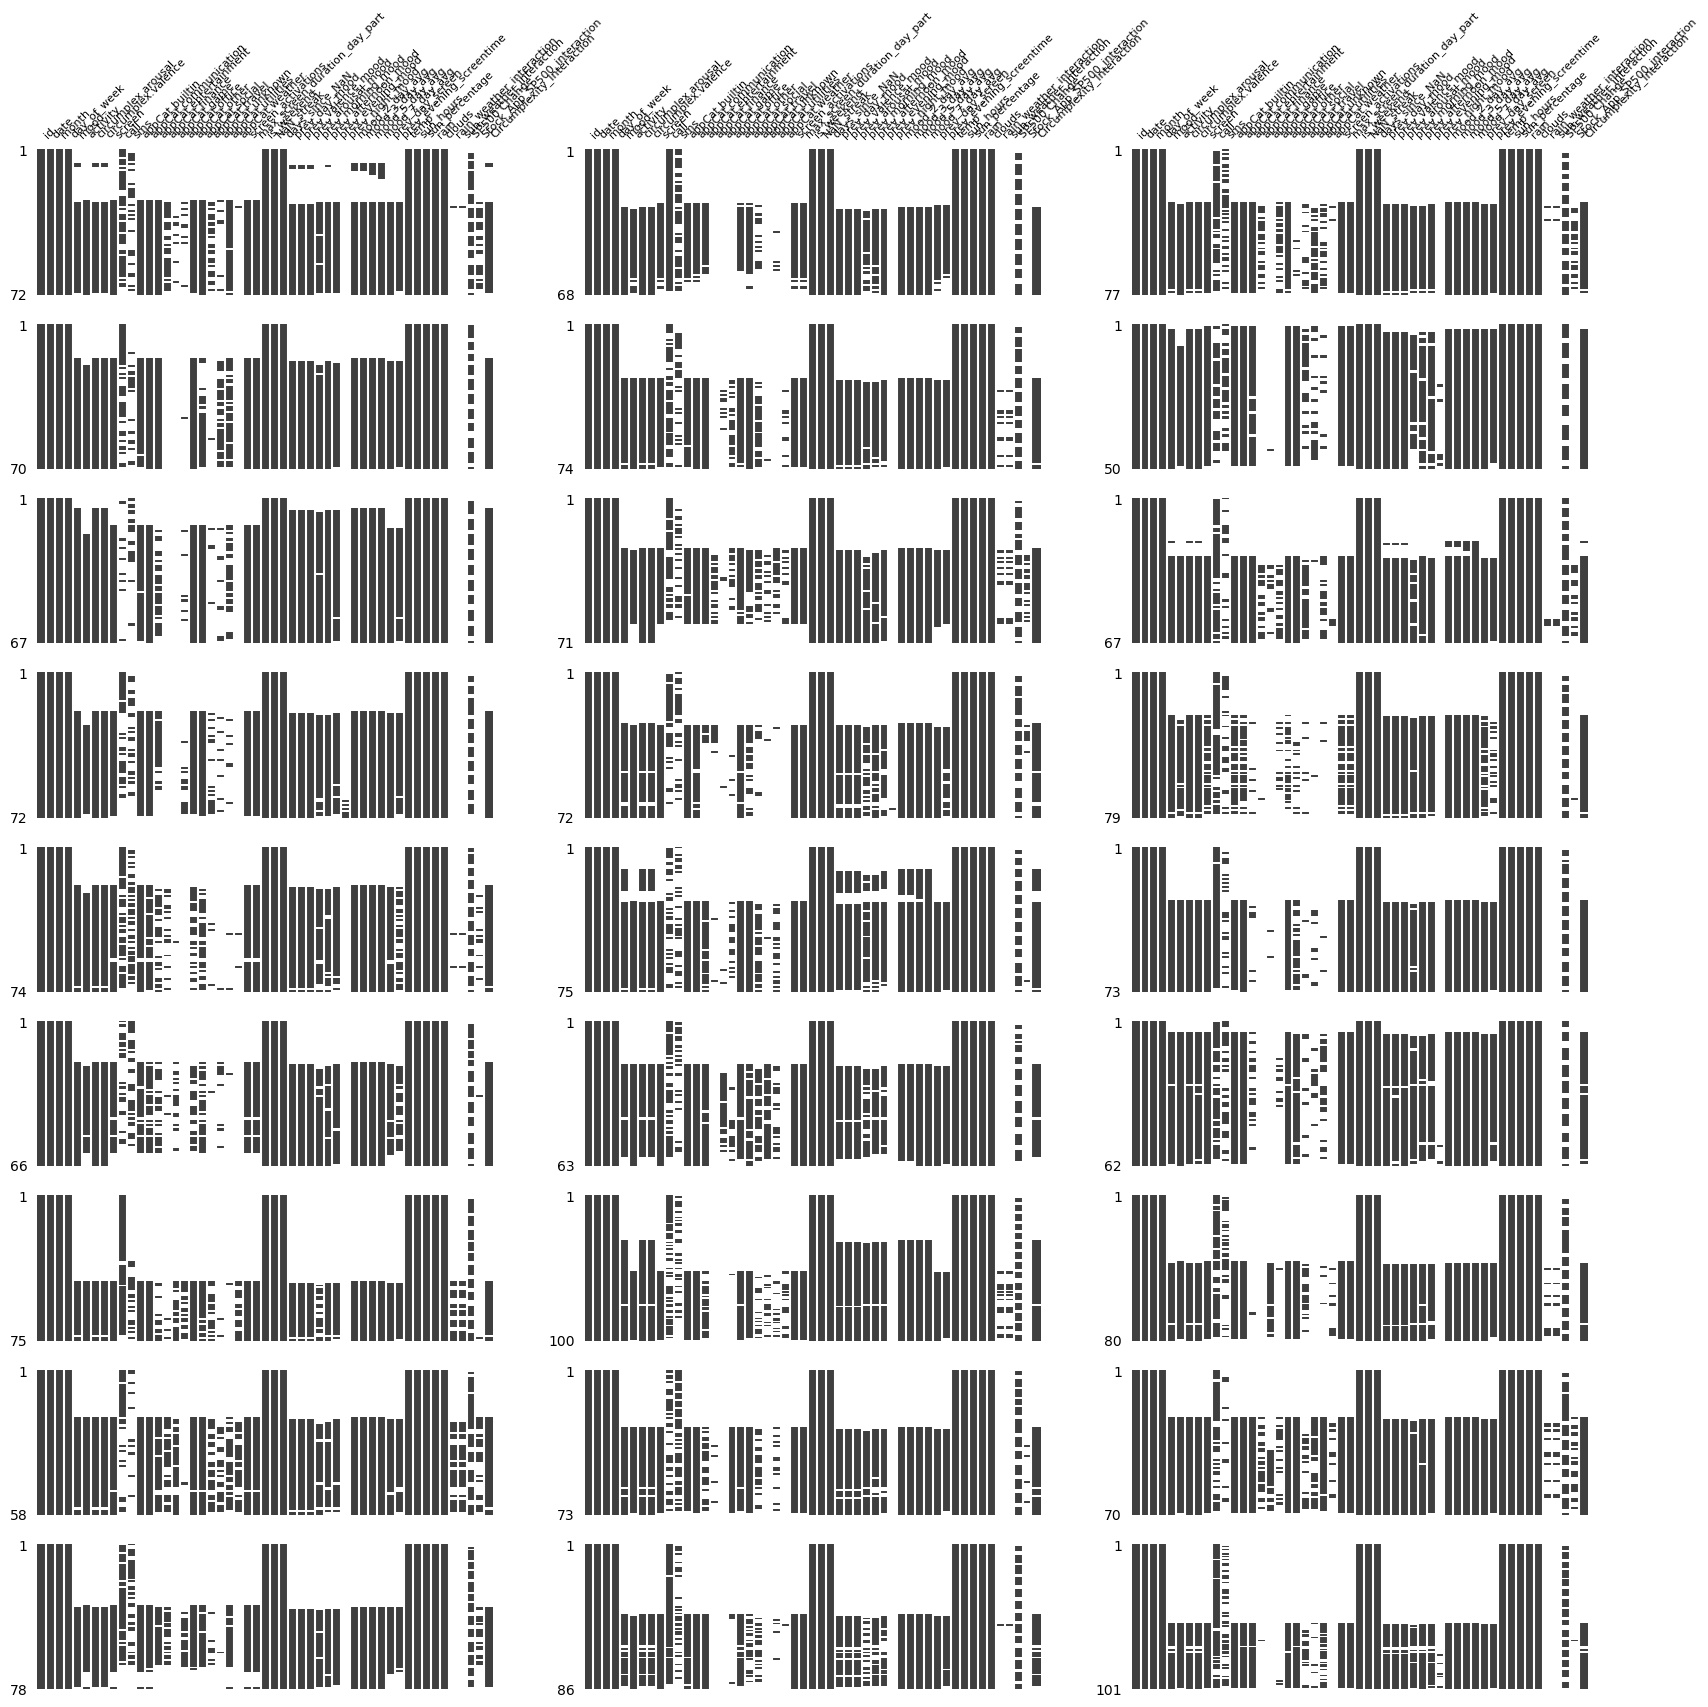

In [72]:
# replace empty values with NaN
# data_1b = data_1b.replace('', np.nan)

barplot = msno.bar(data_1b, color='darkgreen')
barplot.figure.savefig('figs/barplot.png')

# create 27 subplots
matrixfig, axes = plt.subplots(9, 3, figsize=(20, 20))

# loop over all unique users and plot a msno matrix for that user in each in one of the subplots
for i, user in enumerate(data_1b['id'].unique()):
    user_mask = data_1b['id'] == user
    user_df = data_1b[user_mask]
    ax = axes[i // 3, i % 3]
    msno.matrix(user_df, ax=ax, fontsize=8, sparkline=False, labels=True)
    if i // 3 != 0:
        ax.set_xticklabels([])  # remove x tick labels from all subplots after the first three

# save the figure
matrixfig.savefig('figs/matrixplot.png')

# lastly, we will save some figs per user individually
for user in data_1b['id'].unique():
    user_mask = data_1b['id'] == user
    user_df = data_1b[user_mask]
    msno.matrix(user_df, fontsize=12, sparkline=True, labels=True)
    plt.title(f"Matrixplot for user {user}", fontsize=20)
    plt.savefig(f'figs/matrixplots/matrixplot_user_{user}.png', bbox_inches='tight')
    plt.close()


As you can see, the data for all users starts with a chunk of time in which nothing but calls and sms's are logged. From the moment the user starts inputting mood, valence, and arousal, this is mostly consistent, and other activities start to be logged too. This leads us to the conlcusion that this first period is not relevant to a prediction task, and assume the data for a user starts from the first point they log their mood. This is done by the following code:

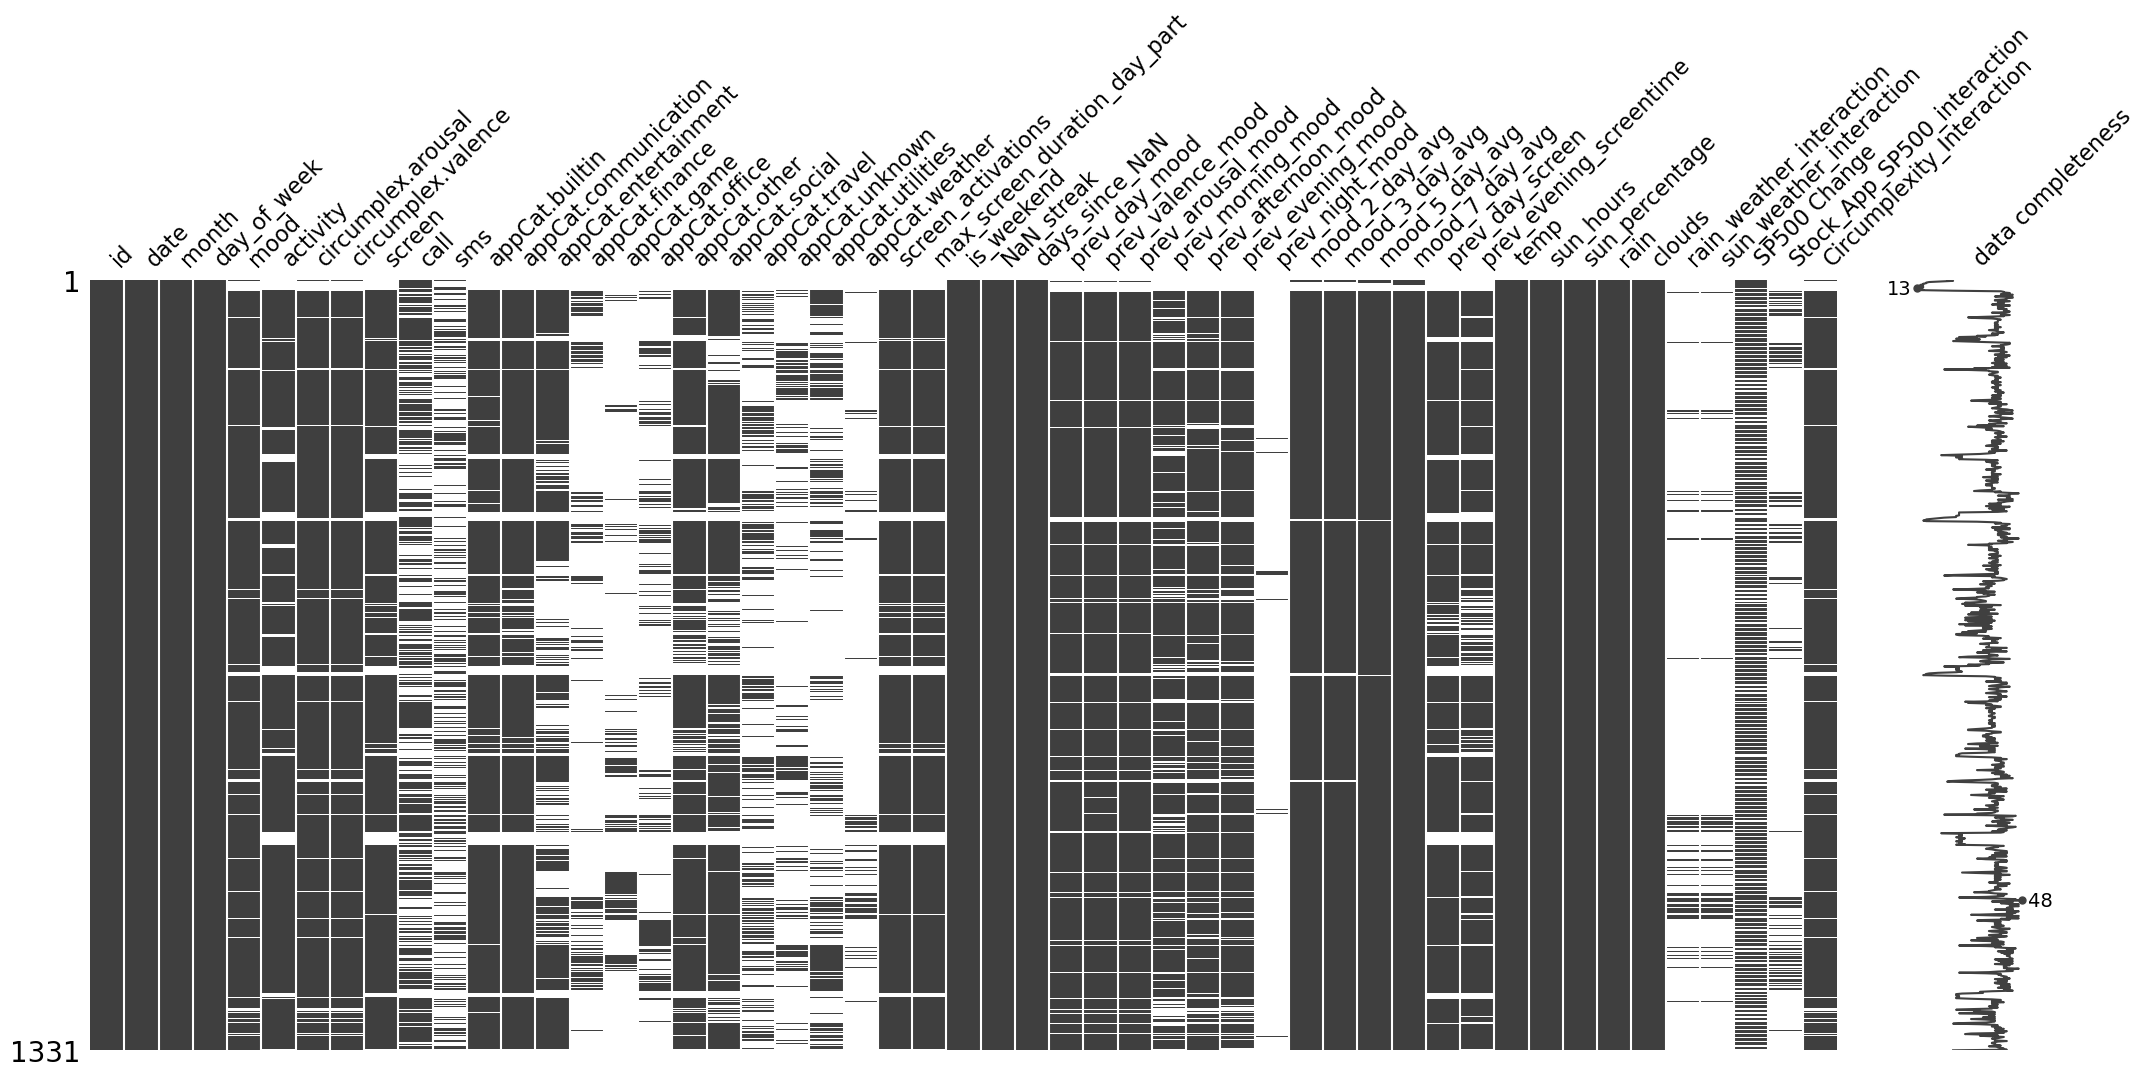

In [76]:
# As you can see, the data for all users starts with a chunk of time in which nothing but calls and sms's are logged. 
# From the moment the user starts inputting mood, valence, and arousal, this is mostly consistent, and other activities start to be logged too. 
# This leads us to the conlcusion that this first period is not relevant to a prediction task, and assume the data for a user starts from the first point they log their mood. 
# This is done by the following code:

# get the first time a user logs their mood
# get a mask for when mood is logged
mood_mask = data_1b['mood'] >= 0
just_mood = data_1b[mood_mask]
first_mood_time = just_mood.groupby('id')['date'].min()

data_cut = pd.DataFrame()
# split df for each user and then concatenate into a new one
for id in data_1b['id'].unique():
    id_mask = data_1b['id'] == id
    id_df = data_1b[id_mask]
    first_mood_time_mask = id_df['date'] >= first_mood_time[id]
    id_df = id_df[first_mood_time_mask]
    data_cut = pd.concat([data_cut, id_df])

# check if it worked
msno.matrix(data_cut, labels=True)
plt.savefig('figs/matrixplot_cut.png', bbox_inches='tight')

# save it
data_cut.to_csv('data/data_post_first_mood.csv')

<AxesSubplot: >

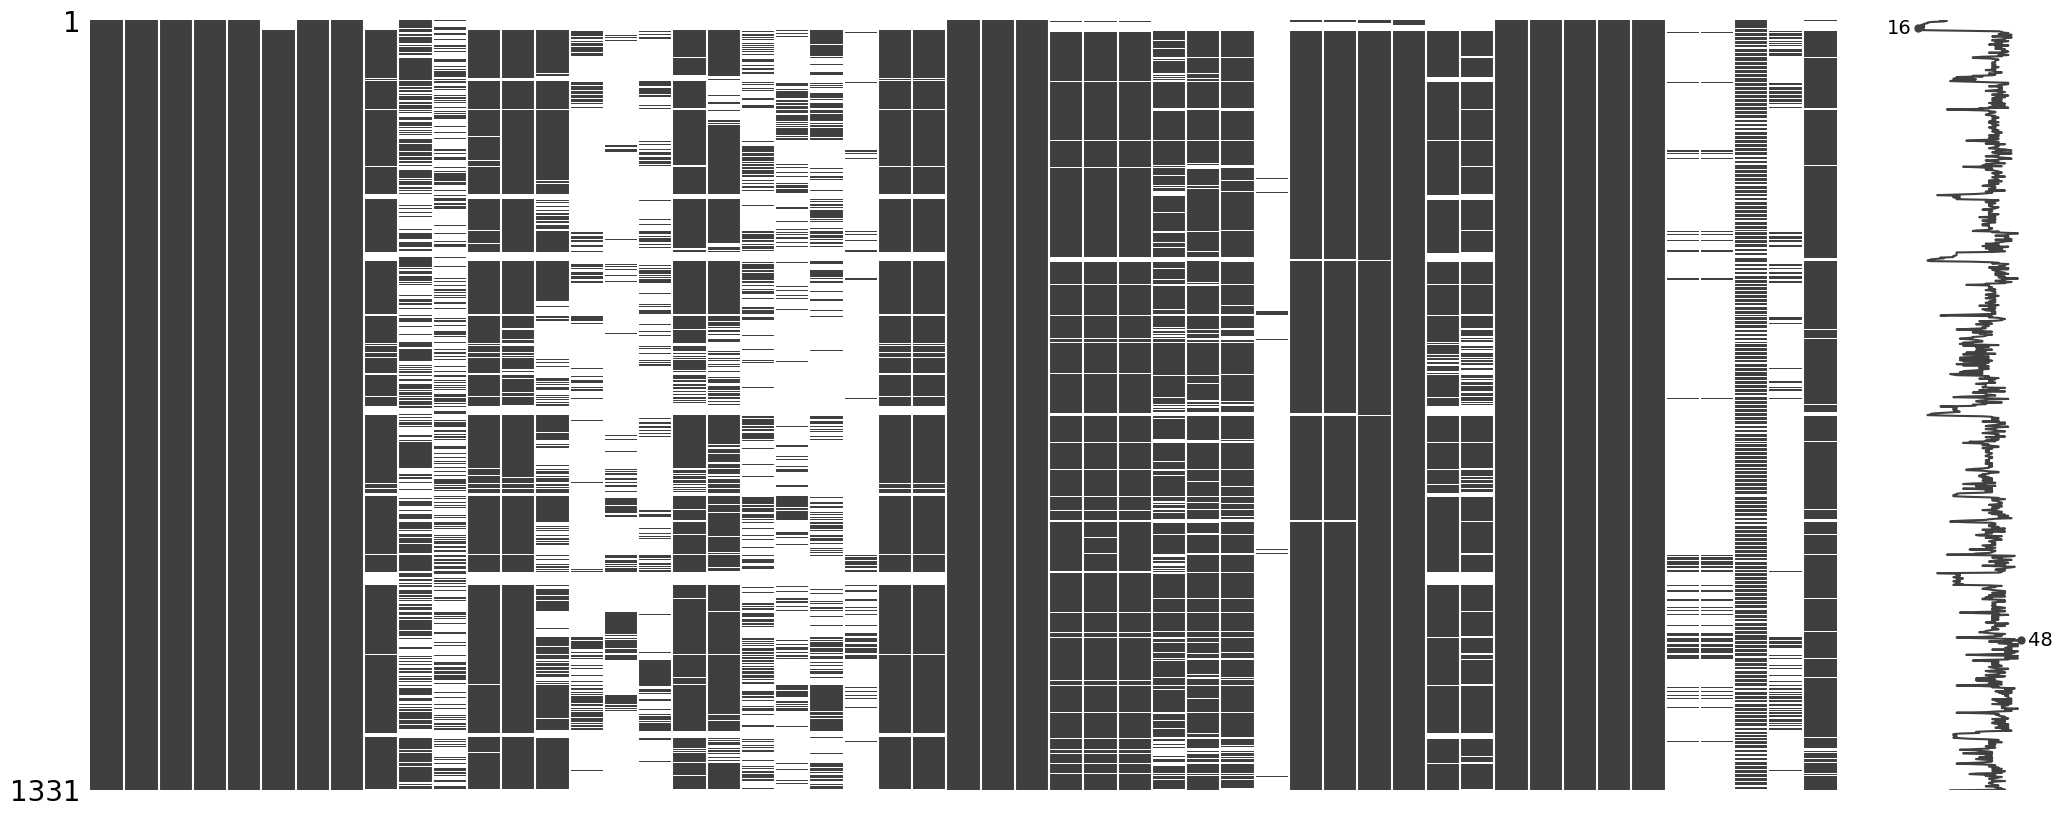

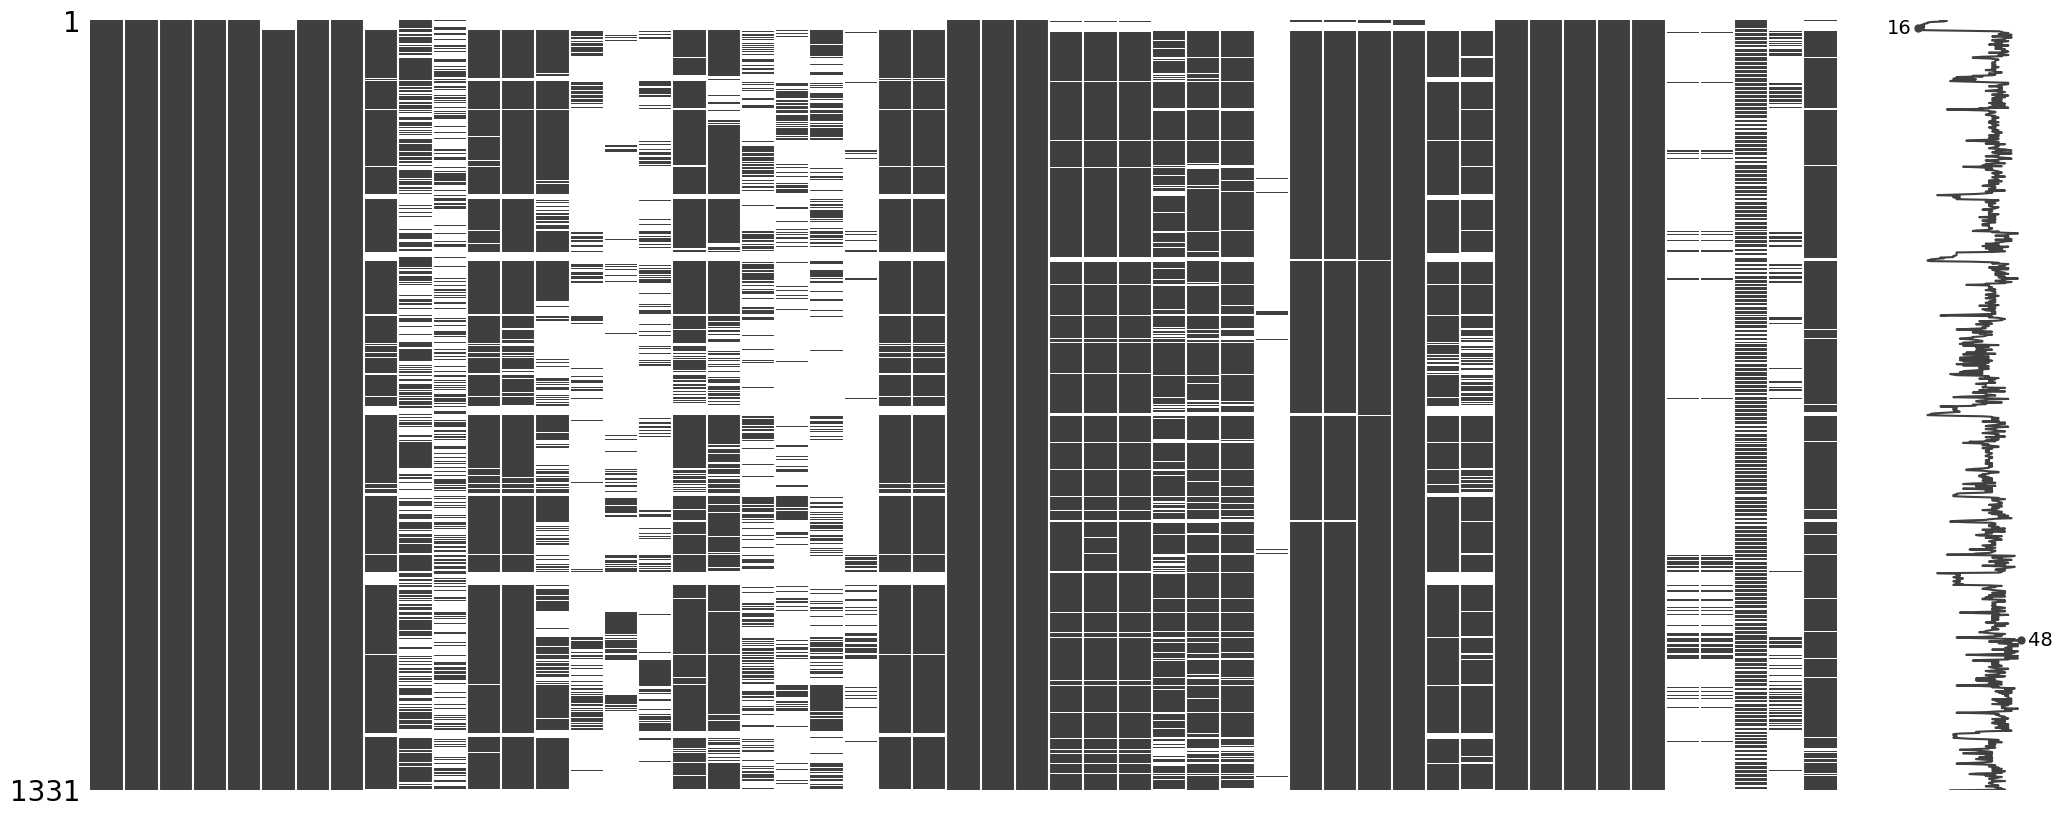

In [74]:
## IMPUTING MISSING VALUES
# impute missing values: forward fill
data = pd.read_csv('data/data_post_first_mood.csv')
data_ffill = data
data_ffill[['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']] = data[['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']].fillna(method='ffill')
data_ffill[['max_screen_duration_day_part']] = data[['max_screen_duration_day_part']].fillna(method='ffill')
data_ffill[['2_day_valence', '2_day_arousal']] = data[['2_day_valence', '2_day_arousal']].fillna(method='ffill')
data_ffill[['current_morning_mood', 'current_afternoon_mood', 'current_evening_mood']] = data[['current_morning_mood', 'current_afternoon_mood', 'current_evening_mood']].fillna(method='ffill')
data_ffill[['mood_2_day_avg', 'mood_3_day_avg', 'mood_5_day_avg', 'mood_7_day_avg']] = data[['mood_2_day_avg', 'mood_3_day_avg', 'mood_5_day_avg', 'mood_7_day_avg']].fillna(method='ffill')
data_ffill[['circumplexity_interaction']] = data[['circumplexity_interaction']].fillna(method='ffill')

# create datetimeindex from time column in order to be able to interpolate using the time method
datetimeindex = pd.to_datetime(data['date'])

# replace time column with datetimeindex
data.index = datetimeindex
data = data.drop(columns=['Unnamed: 0'])
data_ffill = data_ffill.drop(columns=['Unnamed: 0'])

# interpolate using time method
data_interpolated = data
data_interpolated[['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']] = data[['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']].interpolate(method='time')
data_interpolated[['max_screen_duration_day_part']] = data[['max_screen_duration_day_part']].interpolate(method='time')
data_interpolated[['2_day_valence', '2_day_arousal']] = data[['2_day_valence', '2_day_arousal']].interpolate(method='time')
data_interpolated[['current_morning_mood', 'current_afternoon_mood', 'current_evening_mood']] = data[['current_morning_mood', 'current_afternoon_mood', 'current_evening_mood']].interpolate(method='time')
data_interpolated[['mood_2_day_avg', 'mood_3_day_avg', 'mood_5_day_avg', 'mood_7_day_avg']] = data[['mood_2_day_avg', 'mood_3_day_avg', 'mood_5_day_avg', 'mood_7_day_avg']].interpolate(method='time')
data_interpolated[['circumplexity_interaction']] = data[['circumplexity_interaction']].interpolate(method='time')

# reset index back to what it was
new_index = pd.Index(range(0, len(data)))
data.index = new_index
data_ffill.index = new_index

# save imputed data
data_ffill.to_csv('data/imputed_data_v1.csv')
data_interpolated.to_csv('data/imputed_data_v2.csv')
#  NOW WRITE SOME ABOUT THE PROS AND CONS

# check if it worked
msno.matrix(data_ffill)
msno.matrix(data_interpolated)

Now that all missing averages have been imputed, all missing sums will be filled with zeroes

In [ ]:
final_data_impute1 = data_ffill.fillna(0)
final_data_impute2 = data_interpolated.fillna(0)

# check
msno.matrix(final_data_impute1)
msno.matrix(final_data_impute2)

display(final_data_impute1.head(10))
display(final_data_impute2.head(10))

final_data_impute1.to_csv('data/imputed_data_v1.csv')
final_data_impute2.to_csv('data/imputed_data_v2.csv')

### Task 2A: Application of Classification Algorithms.

Identify the target (i.e. the class you want to predict) for your dataset. In case you use the
dataset we collected you are free to choose whatever you like. Split up your data in a train
and test set and apply two classification algorithms, at least one of them should have been
discussed during the lectures. Optimize the hyperparameters of the approaches. Measure
and discuss the performance using a performance metric and argue why that is a suitable
metric. Describe all steps in your process clearly and fully to make sure it is reproducible.<br>
Advanced: For the advanced assignment you go through the same steps (and shape it into
a classification problem for predicting the mood of the next day), however you are required
to use two different types of classification algorithms, namely one that uses the dataset you
formed in Task 1C (e.g. using a random forest) and an algorithm that is inherently temporal
(e.g. ARIMA, recurrent neural networks). Also consider a good evaluation setup given the
nature of the dataset.

## Task 2A.1: Classical Classification

As a first classification algorithm, we will implement a random forest. This method does not implicitly make use of the temporal nature of the data.

In [ ]:
# import required packages
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# check the data
display(merged_data.head())

# Split the data into features (X) and target (y)
X = data.drop('mood_tomorrow', axis=1)
y = data['mood_tomorrow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## FITTING THE MODEL
# Create a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict the labels of the test set and test accuracy
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

### Task 2B: Winning Classification Algorithms

Machine learning techniques that are used in Data Mining projects develop quickly these
days. One nice way to track these developments is to see which algorithms win competitions
on websites such as Kaggle. Your task is to describe the approach of the winner of one of those
competitions that focus on a classification tasks. The following sites might serve as starting
points: <br>
- http://www.kaggle.com/ - DM competitions
- https://www.kdd.org/kdd-cup - KDD Cup <br>

You should be able to find other relevant competitions by searching the Web.
The main goal is that you can demonstrate that you understand a technique that beats other
techniques under certain conditions (specified by the task and data at hand). Here’s what
we’d like you to include in the report for this task: <br>

- A description of the competition: what competition, when was it held, what data they
were using, what task(s) they were solving, what evaluation measure(s) they used.
- Who was the winner, what technique did they use?
- What was the main idea of the winning approach? (Typically this would come from a
paper written by the winners.)
- What makes the winning approach stand out, or how is it different from standard, or
non-winning methods? <br>
Particular rules and points to consider:
• A suggestion: 1 page should be more than enough for this task.
• Needless to say, but for the record, please do not copy and paste from papers. Always
cite (properly) the source of the paper you are using.

##### Answer here

### Task 3: Association Rules

We have seen the APRIORI algorithm during the lecture that targets finding associations in
datasets, predicting that an item is likely to be bought given other items that are in the shop-
ping basket already. As mentioned during the lecture, many innovations have been made to
improve the APRIORI and other methods. One category of improvements involves grouping
of products into higher level product categories (e.g. a Pizza Margherita and Pizza Quattro
Formaggio are both pizza’s). Find an approach that aims to do this and describe it. Discuss
the pros and cons of such an approach.



##### Answer here

### Task 4: Numerical Prediction
Similar to Task 2A, apply a machine learning algorithm to your dataset, but now focus on pre-
dicting a numerical target. Describe similar details as you have for the classification problem.
Highlight the differences you see between the two types of prediction tasks.

##### Answer here

### Task 5A: Characteristics of Evaluation Metrics: 
Consider the following two error measures: mean squared error (MSE) and mean absolute
error (MAE).
- Write down their corresponding formulae.
- Discuss: Why would someone use one and not the other?
- Describe an example situation (dataset, problem, algorithm perhaps) where using MSE
or MAE would give identical results. Justify your answer (some maths may come handy,
but clear explanation is also sufficient).

##### Answer here

### Task 5B: Impact of Evaluation Metrics

Apply the MSE and MAE as evaluation metrics to the numerical prediction problem you have
worked on under Task 4. Describe how the model behaves under the different characteristics
and describe the implications.

##### Answer here